### **CAR PRICE PREDICTION(used cars)**

#### Our objective is to develop a predictive model to estimate car selling prices accurately.

In [1]:
import pandas as pd

#### **importing data**

In [2]:
data = pd.read_csv("C:/Users/User/Downloads/car_data.csv")

#### **previewing Data**

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.shape

(301, 9)

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [10]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [11]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

#### **Changing the Fuel_Type, Selling_type and Transmission column values to numerical values**

In [13]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
data['Selling_type'] = data['Selling_type'].map({'Dealer': 0, 'Individual': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [14]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### **Visualization**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **Histograms**

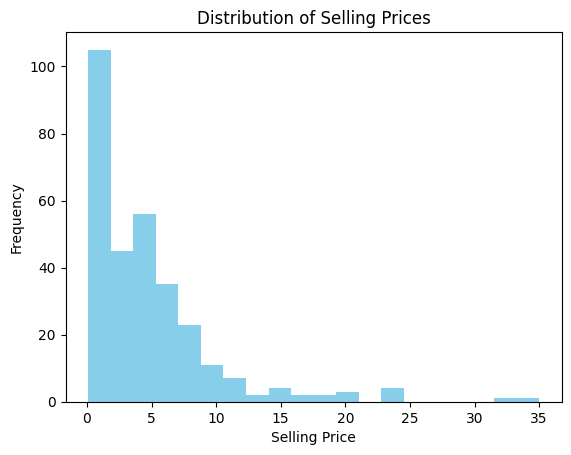

In [16]:
plt.hist(data['Selling_Price'], bins=20, color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

#### **Scatter Plot**

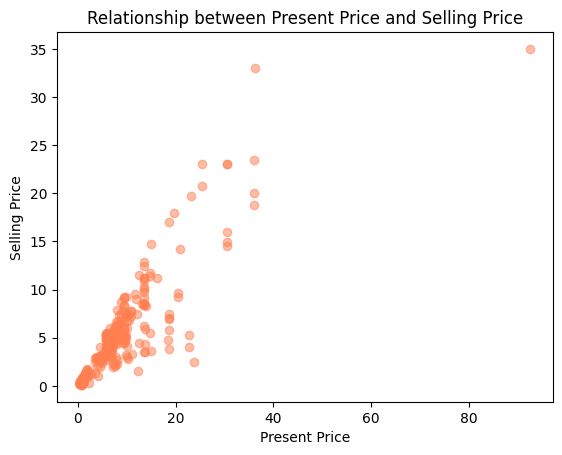

In [17]:
plt.scatter(data['Present_Price'], data['Selling_Price'], color='coral', alpha=0.5)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Relationship between Present Price and Selling Price')
plt.show()

#### **Bar Plot**

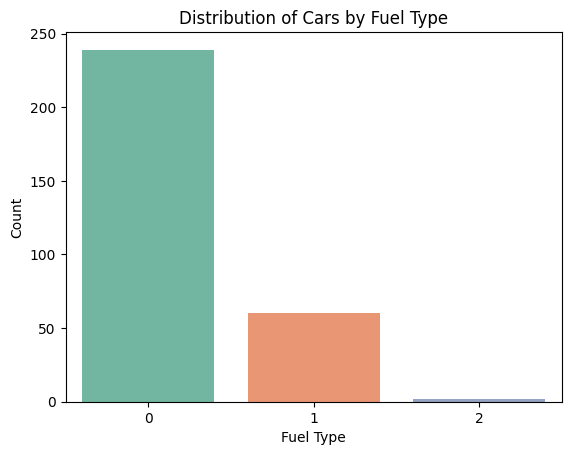

In [18]:
sns.countplot(x='Fuel_Type', hue='Fuel_Type', data=data, palette='Set2', legend=False)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Cars by Fuel Type')
plt.show()

#### **Box Plot**

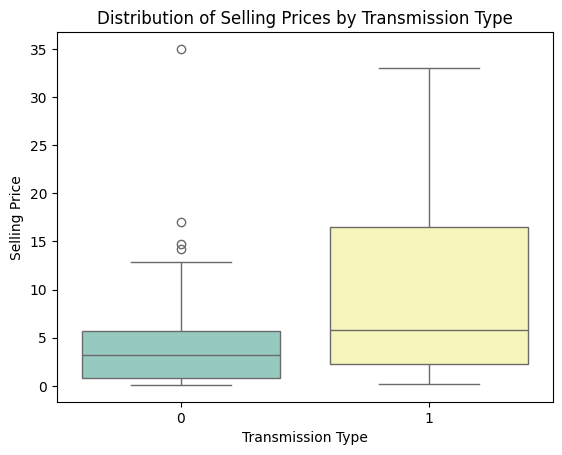

In [19]:
sns.boxplot(x='Transmission', y='Selling_Price', hue='Transmission', data=data, palette='Set3', legend=False)
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Prices by Transmission Type')
plt.show()

#### **Violin Plot**

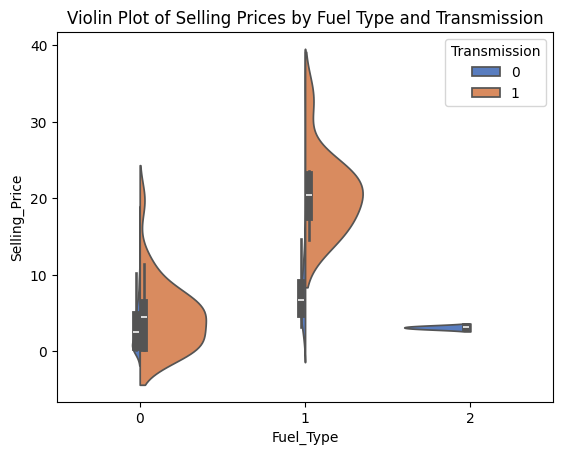

In [20]:
sns.violinplot(x='Fuel_Type', y='Selling_Price', data=data, hue='Transmission', split=True, palette='muted')
plt.title('Violin Plot of Selling Prices by Fuel Type and Transmission')
plt.show()

#### **FacetGrid**

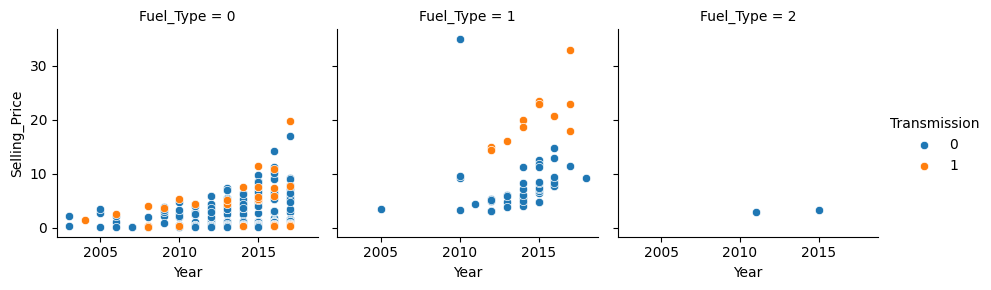

In [21]:
g = sns.FacetGrid(data, col='Fuel_Type', hue='Transmission')
g.map(sns.scatterplot, 'Year', 'Selling_Price')
g.add_legend()
plt.show()

#### **Joint Plot with Regression Line**

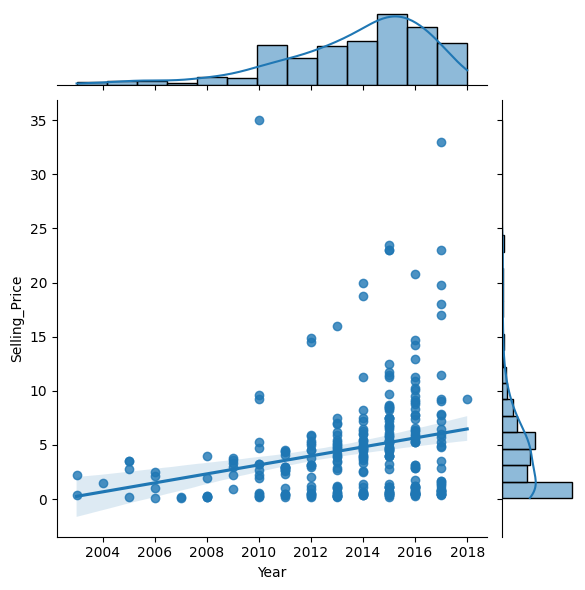

In [22]:
sns.jointplot(x='Year', y='Selling_Price', data=data, kind='reg')
plt.show()

#### **Pairplot with Hue**

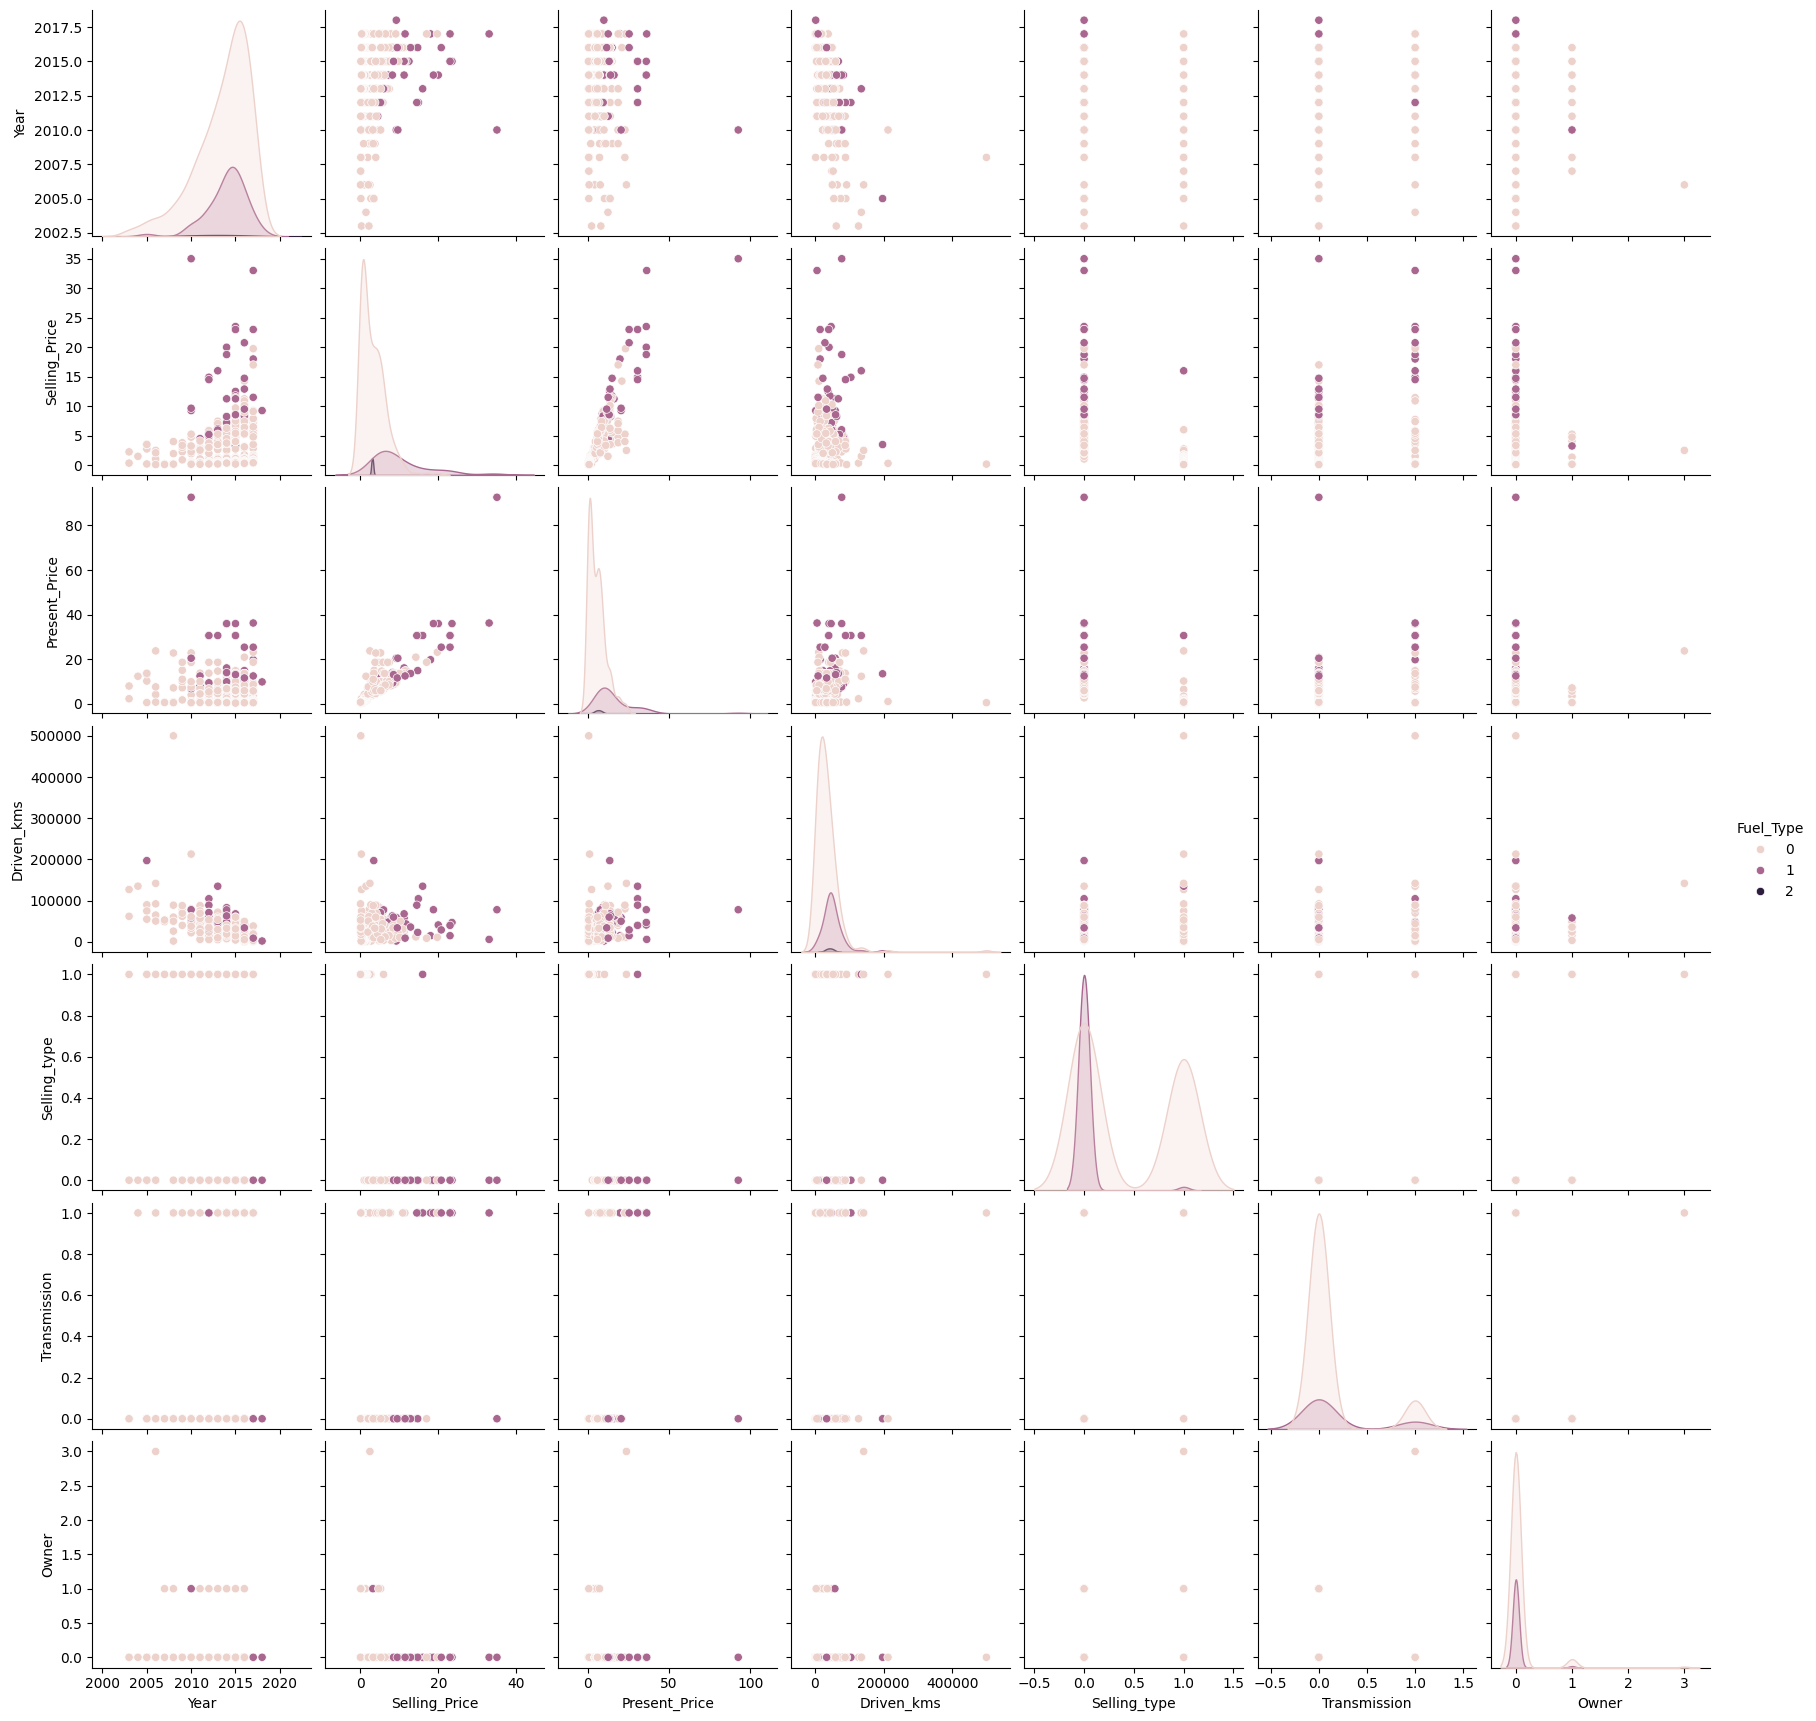

In [23]:
sns.pairplot(data, hue='Fuel_Type', diag_kind='kde')
plt.show()

### **Model Building**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = data.drop(['Car_Name', 'Selling_Price'], axis = 1)

In [26]:
Y = data['Selling_Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = rf.predict(X_test)
y_pred

array([ 0.4752, 10.9544,  5.003 ,  0.1878,  7.341 ,  6.2405,  1.0652,
        0.5788,  0.4772,  6.5995,  7.9093,  1.0188,  7.4787,  0.465 ,
        5.214 ,  2.6485,  1.1527, 13.3175,  0.482 ,  1.5855,  0.2703,
        8.1588,  4.7025,  2.8715,  0.5173,  3.8695,  5.33  ,  3.293 ,
        1.1315,  1.1984,  0.5059,  9.0025,  0.4525,  2.762 ,  7.7606,
        4.2675,  6.1395,  6.2605,  2.6145,  6.751 ,  4.4815,  3.547 ,
        4.824 ,  0.5581,  6.132 ,  0.7403,  7.8695,  6.6035,  2.932 ,
        3.977 ,  4.9375,  1.5411, 22.244 , 19.8147,  6.4025, 10.1523,
        5.0315,  9.1416,  2.739 ,  6.6775,  0.2341,  0.2151,  0.8261,
        0.4573,  4.27  ,  1.1205, 20.976 , 21.5073,  6.3425,  0.47  ,
        3.7675,  3.5725,  5.797 ,  4.5175,  2.8705,  1.0212,  0.7685,
       11.7788,  0.3886,  9.8861,  5.2415,  3.421 ,  5.1805, 15.3424,
        2.59  ,  0.4637,  1.1655,  3.0025,  0.4767, 17.454 ,  1.1259])

In [31]:
mse = mean_squared_error(y_test, y_pred)
mse

1.080256988241759

In [32]:
r2 = r2_score(y_test, y_pred)
r2

0.9620619028365568

### **Conclusion**

#### By focusing on developing a predictive model to accurately estimate car selling prices, we aim to enhance decision-making processes in the automotive industry. Through the deployment of such a model, stakeholders can make informed pricing strategies, optimize inventory management, and ultimately improve overall business performance.